In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os, sys
%matplotlib inline

os.chdir('..\..\..\..')
print(os.getcwd())

from input_configuration import base_year

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


E:\projects\clients\SeaTac\Models\BaseYear\Development\SeaCast_10192023_SubArea


In [2]:
working_dir = r'outputs/agg/dash'
pd.options.display.float_format = '{:0,.2f}'.format
format_percent = "{:,.2%}".format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Tours per Person

In [4]:
df = load_data('tour_purpose_mode')
_df = df.groupby('source').sum()[['toexpfac']].T
_df.rename(index={'toexpfac':'Average Tours'}, inplace=True)

df = load_data('person_type')
_df_person = df.groupby('source').sum()[['psexpfac']].T
_df_person.rename(index={'psexpfac':'Average Tours'}, inplace=True)

_df/_df_person

source,model,survey
Average Tours,1.58,1.68


## City of SeaTac

In [5]:
index_map = {1:'City of SeaTac', 0: "Other"}
df = load_data('tour_purpose_mode')
_df = df.rename(columns={'person_subarea':'subarea_flag'}).groupby(['subarea_flag','source']).sum()[['toexpfac']]
df = load_data('person_type')
_df_person = df.rename(columns={'person_subarea':'subarea_flag'}).groupby(['subarea_flag','source']).sum()[['psexpfac']]
_df_disp = _df.join(_df_person, how='left', on=['subarea_flag','source']).\
    apply(lambda df: df.toexpfac/df.psexpfac, axis=1).\
    reset_index(name='ratio').pivot_table(index='subarea_flag', columns='source', values='ratio')
_df_disp.index = _df_disp.index.map(index_map)
_df_disp.sort_index()

source,model,survey
subarea_flag,,
City of SeaTac,1.61,1.04
Other,1.58,1.69


# Percent of Tours by Purpose

source,model,survey
pdpurp,,
Escort,11.3%,9.2%
Meal,7.2%,6.2%
Personal Business,11.8%,13.4%
School,10.9%,10.6%
Shop,12.3%,11.6%
Social,19.9%,18.7%
Work,26.6%,30.3%


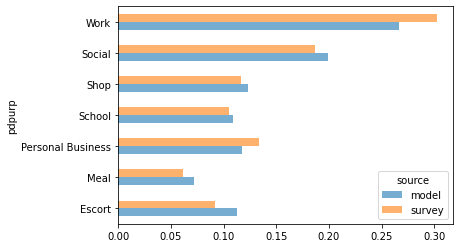

In [6]:
pd.options.display.float_format = '{:0,.1%}'.format
df = load_data('tour_purpose_mode')
_df = df.pivot_table(index='pdpurp', columns='source', aggfunc='sum', values='toexpfac')
_df_sum = _df.sum()
_df = _df/_df_sum
_df.drop('Change Mode Inserted Purpose', axis=0, inplace=True)
_df.plot(kind='barh', alpha=0.6)
_df

## City of SeaTac

In [7]:
df = load_data('tour_purpose_mode').rename(columns={'person_subarea':'subarea_flag'})
_df = df.pivot_table(index=['subarea_flag','pdpurp'], columns='source', aggfunc='sum', values='toexpfac')
_df_sum = _df.sum()
_df = (_df/_df_sum).reset_index()
_df

source,subarea_flag,pdpurp,model,survey
0,0,Change Mode Inserted Purpose,NaN,0.0%
1,0,Escort,11.0%,9.2%
2,0,Meal,7.0%,6.2%
3,0,Personal Business,11.5%,13.3%
4,0,School,10.7%,10.5%
5,0,Shop,12.1%,11.5%
6,0,Social,19.5%,18.5%
7,0,Work,26.0%,29.9%
8,1,Escort,0.3%,0.0%
9,1,Meal,0.2%,0.0%


Other
source             pdpurp  model  survey
1                  Escort  11.0%    9.2%
2                    Meal   7.0%    6.2%
3       Personal Business  11.5%   13.3%
4                  School  10.7%   10.5%
5                    Shop  12.1%   11.5%
6                  Social  19.5%   18.5%
7                    Work  26.0%   29.9%
City of SeaTac
source             pdpurp  model  survey
8                  Escort   0.3%    0.0%
9                    Meal   0.2%    0.0%
10      Personal Business   0.2%    0.1%
11                 School   0.2%    0.1%
12                   Shop   0.3%    0.1%
13                 Social   0.4%    0.2%
14                   Work   0.6%    0.4%


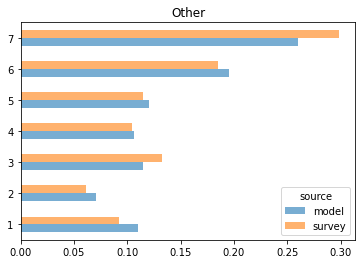

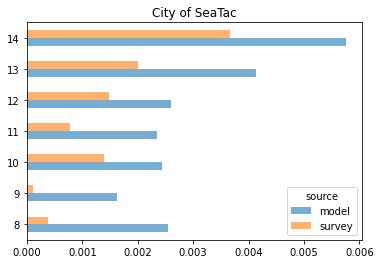

In [8]:
df = load_data('tour_purpose_mode').rename(columns={'person_subarea':'subarea_flag'})
_df = df.pivot_table(index=['subarea_flag','pdpurp'], columns='source', aggfunc='sum', values='toexpfac')
_df_sum = _df.sum()
_df = (_df/_df_sum).reset_index()
_df = _df.loc[_df.pdpurp!='Change Mode Inserted Purpose',:]
for county, _df_county in _df.groupby('subarea_flag'): 
    print(index_map.get(county))
    print(_df_county.drop(columns='subarea_flag'))   
    _df_county.drop(columns='subarea_flag').plot(kind='barh', alpha=0.6, title=index_map.get(county))


# Tours per Person by Purpose

source,model,survey
pdpurp,,
Escort,0.18,0.16
Meal,0.11,0.10
Personal Business,0.19,0.23
School,0.17,0.18
Shop,0.20,0.20
Social,0.32,0.31
Work,0.42,0.51


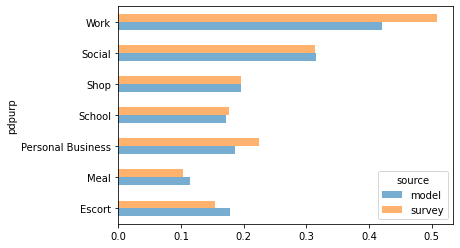

In [9]:
pd.options.display.float_format = '{:0,.2f}'.format
df = load_data('tour_purpose_mode')
_df = df.pivot_table(index='pdpurp', columns='source', aggfunc='sum', values='toexpfac')
# Total population
df = load_data('person_type')
_df_person = df.groupby('source').sum()[['psexpfac']].T
_df_person.rename(columns={'psexpfac': 'toexpfac'}, inplace=True)
_df.drop('Change Mode Inserted Purpose', axis=0, inplace=True)
_df = _df/_df_person.values
_df.plot(kind='barh', alpha=0.6)
_df

## City of SeaTac

Other
source             model  survey
pdpurp                          
Escort              0.18    0.16
Meal                0.11    0.11
Personal Business   0.19    0.23
School              0.17    0.18
Shop                0.20    0.20
Social              0.32    0.32
Work                0.42    0.51
City of SeaTac
source             model  survey
pdpurp                          
Escort              0.19    0.04
Meal                0.12    0.01
Personal Business   0.18    0.15
School              0.18    0.08
Shop                0.19    0.16
Social              0.31    0.21
Work                0.43    0.39


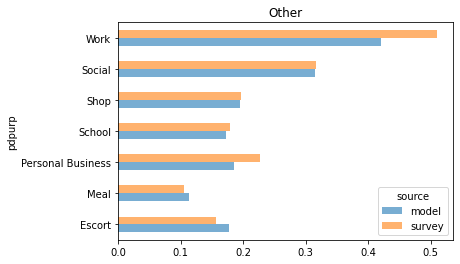

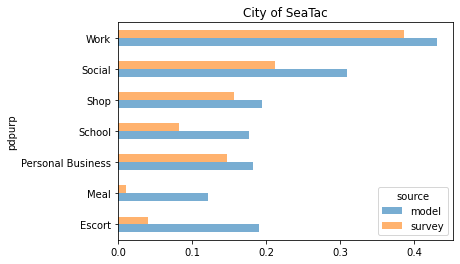

In [10]:
df = load_data('tour_purpose_mode').rename(columns={'person_subarea':'subarea_flag'})
_df = df.groupby(['subarea_flag', 'source', 'pdpurp'])['toexpfac'].sum().reset_index()
# Total population
df = load_data('person_type').rename(columns={'person_subarea':'subarea_flag'})
_df_person = df.groupby(['subarea_flag', 'source']).sum()[['psexpfac']]
_df = _df.loc[_df.pdpurp!='Change Mode Inserted Purpose',:]
_df = _df.join(_df_person, how='outer', on=['subarea_flag','source'])
_df['tpp']= _df.apply(lambda df: df.toexpfac/df.psexpfac, axis=1)
_df = _df.pivot_table(index=['subarea_flag', 'pdpurp'], columns='source', values='tpp').reset_index(level=0)
for county, _df_county in _df.groupby('subarea_flag'): 
    print(index_map.get(county))
    print(_df_county.drop(columns='subarea_flag'))   
    _df_county.drop(columns='subarea_flag').plot(kind='barh', alpha=0.6, title=index_map.get(county))

# Tours by Person Type

source,model,survey
pptyp,,
Child Age 0-4,"267,649","363,125"
Child Age 5-15,"741,889","888,832"
Full-Time Worker,"2,720,074","2,943,230"
High School Student Age 16+,"213,676","180,589"
Non-Working Adult Age 65+,"683,102","945,913"
Non-Working Adult Age <65,"963,238","512,159"
Part-Time Worker,"540,340","464,305"
University Student,"280,706","205,832"


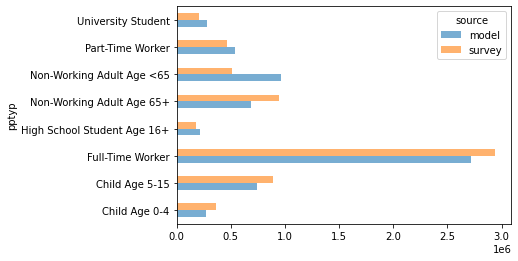

In [11]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('tour_purpose_mode')

df = df.pivot_table(index='pptyp', columns='source', aggfunc='sum', values='toexpfac')
df.plot(kind='barh', alpha=0.6)
df

## City of SeaTac

Other
source             model  survey
pdpurp                          
Escort                 0       0
Meal                   0       0
Personal Business      0       0
School                 0       0
Shop                   0       0
Social                 0       0
Work                   0       1
City of SeaTac
source             model  survey
pdpurp                          
Escort                 0       0
Meal                   0       0
Personal Business      0       0
School                 0       0
Shop                   0       0
Social                 0       0
Work                   0       0


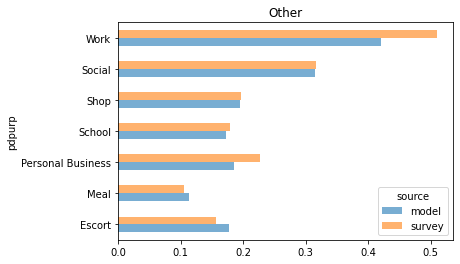

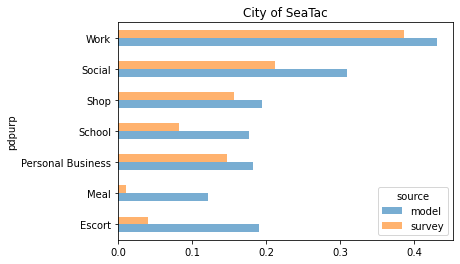

In [12]:
df = load_data('tour_purpose_mode').rename(columns={'person_subarea':'subarea_flag'})

df = df.pivot_table(index=['subarea_flag', 'pptyp'], columns='source', aggfunc='sum', values='toexpfac').reset_index(level=0)
for county, _df_county in _df.groupby('subarea_flag'): 
    print(index_map.get(county))
    print(_df_county.drop(columns='subarea_flag'))   
    _df_county.drop(columns='subarea_flag').plot(kind='barh', alpha=0.6, title=index_map.get(county))

## Work Tours by Person Type

source,model,survey
pptyp,,
Full-Time Worker,"1,455,122","1,719,034"
High School Student Age 16+,"8,670","3,826"
Part-Time Worker,"186,742","191,551"
University Student,"55,761","48,417"


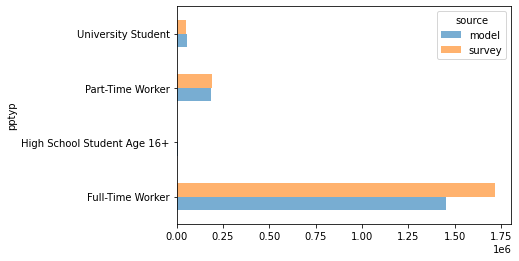

In [13]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('tour_purpose_mode')
df = df[(df['pdpurp'] == 'Work') & (df['pptyp'].isin(['Full-Time Worker','High School Student Age 16+',
                                                     'Part-Time Worker','University Student']))]
df = df.pivot_table(index='pptyp', columns='source', aggfunc='sum', values='toexpfac')
df.plot(kind='barh', alpha=0.6)
df

Other
source             model  survey
pdpurp                          
Escort                 0       0
Meal                   0       0
Personal Business      0       0
School                 0       0
Shop                   0       0
Social                 0       0
Work                   0       1
City of SeaTac
source             model  survey
pdpurp                          
Escort                 0       0
Meal                   0       0
Personal Business      0       0
School                 0       0
Shop                   0       0
Social                 0       0
Work                   0       0


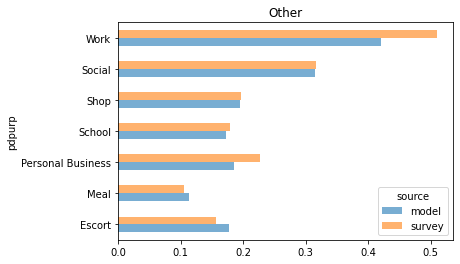

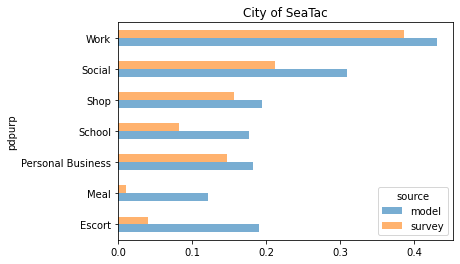

In [14]:
df = load_data('tour_purpose_mode').rename(columns={'person_subarea':'subarea_flag'})
df = df[(df['pdpurp'] == 'Work') & (df['pptyp'].isin(['Full-Time Worker','High School Student Age 16+',
                                                     'Part-Time Worker','University Student']))]
df = df.pivot_table(index=['subarea_flag', 'pptyp'], columns='source', aggfunc='sum', values='toexpfac').reset_index(level=0)
for county, _df_county in _df.groupby('subarea_flag'): 
    print(index_map.get(county))
    print(_df_county.drop(columns='subarea_flag'))   
    _df_county.drop(columns='subarea_flag').plot(kind='barh', alpha=0.6, title=index_map.get(county))